In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho):
    
    G = nx.watts_strogatz_graph(popsize, degree, 0.2)
    
    A = np.array(nx.adjacency_matrix(G).todense())
    X = (np.random.rand(popsize)-0.5) * 2
    S = np.random.choice(2,popsize,p=[rho,1-rho])
    XT = []

    arr = np.arange(popsize)
    np.random.shuffle(arr)

    for t in np.arange(T):

        if t % 50 == 0:
            print("{:1.2f}".format(1.0*t/T), end='\r')
            
            XT.append(np.array(X))

        for i in arr:

            neighs = np.arange(popsize)[A[i]>0]

            if neighs.size > 0:
                X[i] = X[i] * gamma + K * np.sum(np.tanh((np.sign(X[neighs])*np.sign(X[i]))**S[i]*X[neighs] * alpha)) / neighs.size
    

            k = neighs[np.random.randint(neighs.size)]
            neighsK = np.arange(popsize)[A[k]>0]

            if neighsK.size < 2:
                continue
                
            sim = np.dot(A, A)[i]
            
            normal1 = np.sum(A, axis=0)
            normal2 = np.sum(A, axis=1)
            normal = (normal1 + normal2)[i] - sim
            sim = sim / normal
            
            sim = sim
            sim = (sim*(1 - 2 * eps) + eps)
            sim = sim**eta
            sim = sim*(1-A[i])
            sim = sim / np.sum(sim)

            j = np.random.choice(np.arange(popsize), p=sim)

            if j == i:
                continue

            A[i,k] = 0
            A[k,i] = 0

            A[i,j] = 1
            A[j,i] = 1
            
            
    return A, XT, X

In [2]:
def plotTimeSeries(XT):
    fig, ax = plt.subplots()
    ax.plot(XT)
    plt.show()
    
def plotGraph(A, X):
    G = nx.Graph(A)
    print(nx.number_connected_components(G))
    nx.draw(G, pos=nx.spring_layout(G, iterations=10, scale=2), node_color=X, cmap="bwr", vmin=-10, vmax=10, 
        edgecolors="black")
    plt.show()

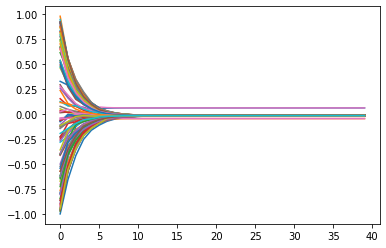

16


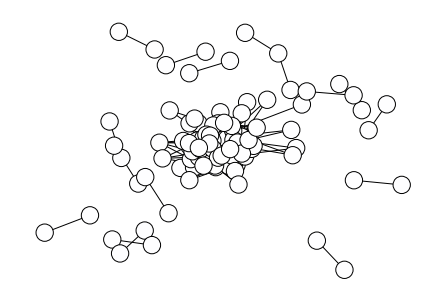

In [3]:
#Replicate Figure 1
popsize = 100
degree = 10
eps = 0.00
T = 2000
gamma = 0.99
K = 0.1
rho = 1.0

#panel A
alpha=0.1
eta=1.0
A, XT, X = runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho)
plotTimeSeries(XT)
plotGraph(A, X)

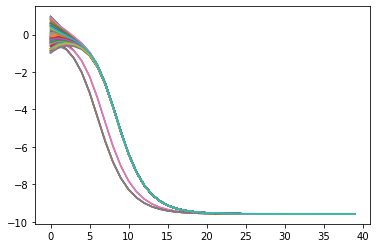

13


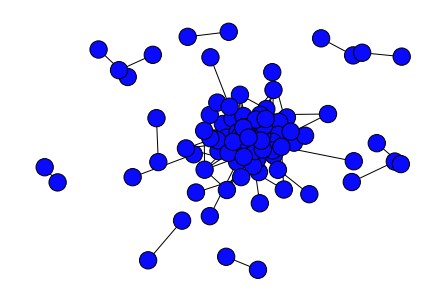

In [4]:
#panel B
alpha=0.2
eta=1.0
A, XT, X = runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho)
plotTimeSeries(XT)
plotGraph(A, X)

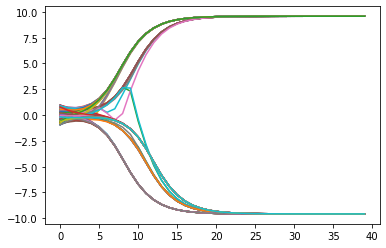

10


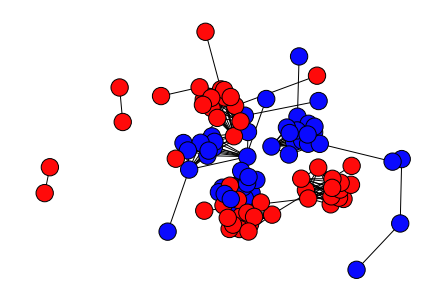

In [5]:
#panel C
alpha=0.2
eta=4.0
A, XT, X = runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho)
plotTimeSeries(XT)
plotGraph(A, X)

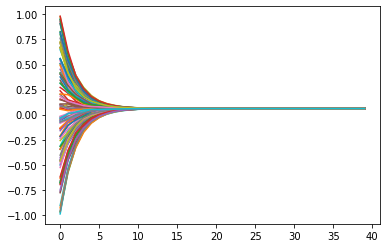

1


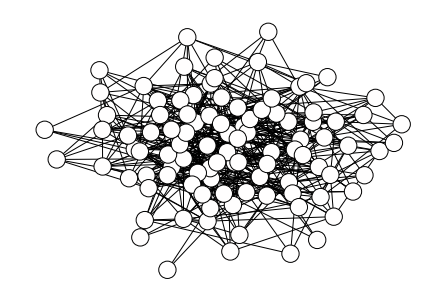

In [6]:
#Replicate Figure 2 (5 random points)
popsize = 100
degree = 10
eps = 0.01
T = 2000
gamma = 0.99
K = 0.1
rho = 1.0

#point 1
alpha=0.1
eta=0.2
A, XT, X = runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho)
plotTimeSeries(XT)
plotGraph(A, X)

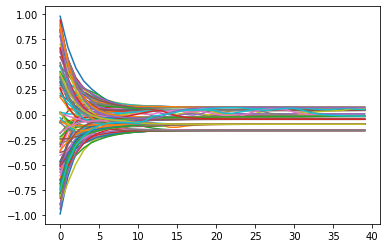

6


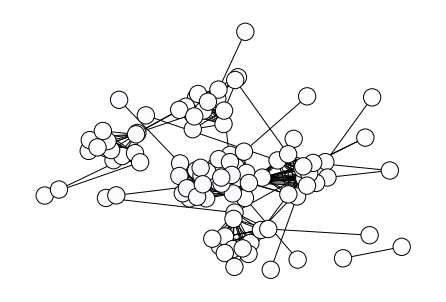

In [7]:
#point 2
alpha=0.1
eta=5.0
A, XT, X = runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho)
plotTimeSeries(XT)
plotGraph(A, X)

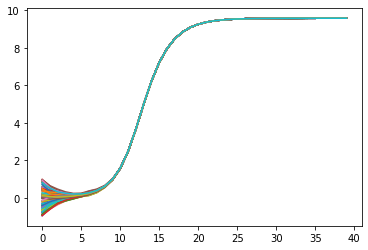

2


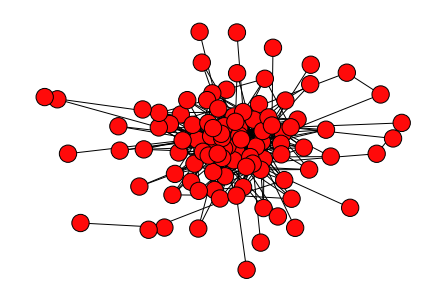

In [8]:
#point 3
alpha=0.2
eta=1.4
A, XT, X = runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho)
plotTimeSeries(XT)
plotGraph(A, X)

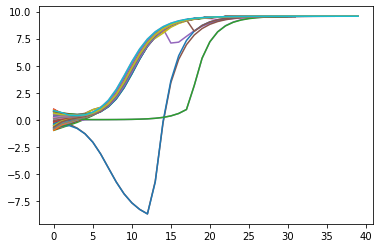

18


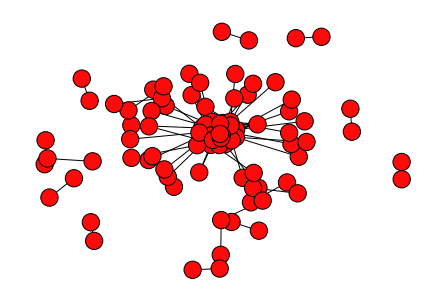

In [9]:
#point 4
alpha=0.2
eta=2.0
A, XT, X = runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho)
plotTimeSeries(XT)
plotGraph(A, X)

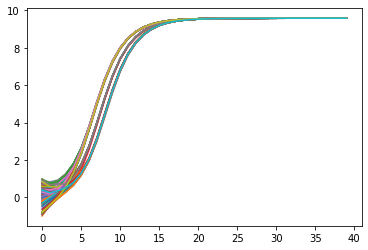

14


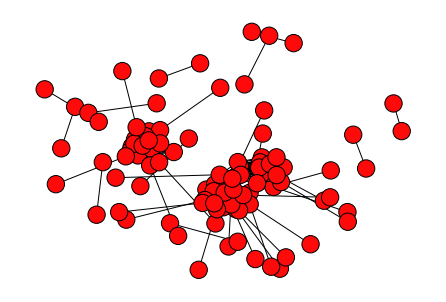

In [10]:
#point 5
alpha=0.2
eta=2.6
A, XT, X = runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho)
plotTimeSeries(XT)
plotGraph(A, X)

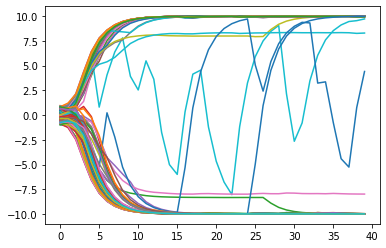

6


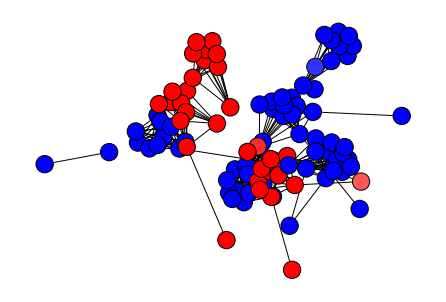

In [11]:
#point 6
alpha=0.4
eta=4.0
A, XT, X = runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho)
plotTimeSeries(XT)
plotGraph(A, X)

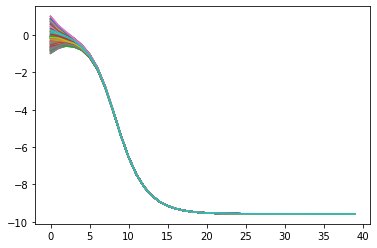

1


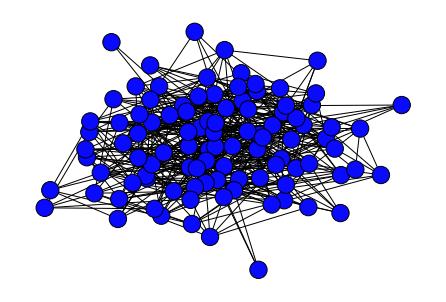

In [12]:
#Replicate Figure 4 (3 points)
popsize = 100
degree = 10
eps = 0.01
T = 2000
gamma = 0.99
K = 0.1
alpha=0.2

#A
rho = 1.0
eta=0.5
A, XT, X = runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho)
plotTimeSeries(XT)
plotGraph(A, X)

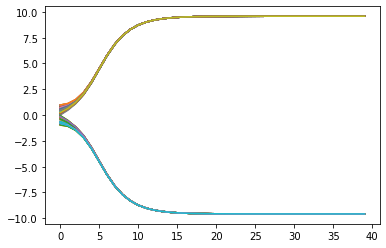

1


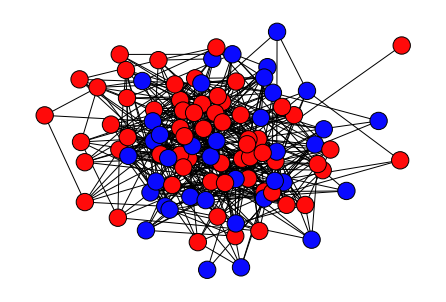

In [13]:
#B
rho = 0.0
eta=0.5
A, XT, X = runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho)
plotTimeSeries(XT)
plotGraph(A, X)

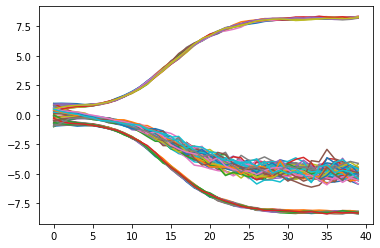

1


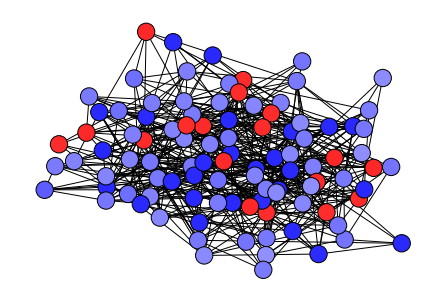

6.550503501594094
5.73885254839226


In [14]:
#C
rho = 0.5
eta=0.0
A, XT, X = runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho)
plotTimeSeries(XT)
plotGraph(A, X)
print(np.mean(np.abs(X)))
print(np.std(X))

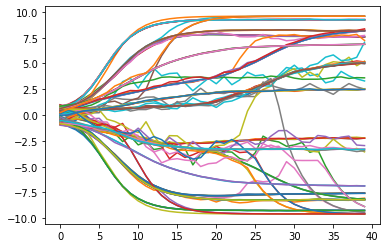

14


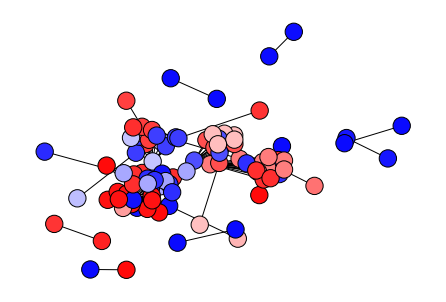

7.039194474812195
7.422803456313541


In [15]:
#D
rho = 0.5
eta = 3.0
A, XT, X = runSimulation(popsize, degree, eps, eta, T, gamma, K, alpha, rho)
plotTimeSeries(XT)
plotGraph(A, X)
print(np.mean(np.abs(X)))
print(np.std(X))